<a href="https://colab.research.google.com/github/Atharva-D/Detection-and-Prediction-of-Diabetes/blob/main/FINAL_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
%load_ext rpy2.ipython

In [5]:
%%R
install.packages('caret')
install.packages('mlbench')
install.packages('devtools') # if not already installed
library(devtools)
#install_github("dcomtois/summarytools")
#install.packages('summarytools')
install.packages("corrplot")
install.packages("gridExtra")
install.packages("timeDate")
install.packages("pROC")
install.packages("caTools")
install.packages("rpart.plot")
install.packages("graphics")
library(caret) #ML Model buidling package
library(tidyverse) #ggplot and dplyr
library(MASS) #Modern Applied Statistics with S
library(mlbench) #data sets from the UCI repository.
#library(summarytools)
library(corrplot) #Correlation plot
library(gridExtra) #Multiple plot in single grip space
library(timeDate) 
library(pROC) #ROC
library(caTools) #AUC
library(rpart.plot) #CART Decision Tree
library(e1071) #imports graphics, grDevices, class, stats, methods, utils
library(graphics) #fourfoldplot

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘progressr’, ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘gower’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/listenv_0.8.0.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 36762 bytes (35 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write 

In [10]:
%%R
data("PimaIndiansDiabetes")
#data = read.csv("data.csv")
data = PimaIndiansDiabetes
print(data)  #printing the diabetes dataset
str(data)  #Structure of the Dataset
summary(data)  #Summary of the dataset

    pregnant glucose pressure triceps insulin mass pedigree age diabetes
1          6     148       72      35       0 33.6    0.627  50      pos
2          1      85       66      29       0 26.6    0.351  31      neg
3          8     183       64       0       0 23.3    0.672  32      pos
4          1      89       66      23      94 28.1    0.167  21      neg
5          0     137       40      35     168 43.1    2.288  33      pos
6          5     116       74       0       0 25.6    0.201  30      neg
7          3      78       50      32      88 31.0    0.248  26      pos
8         10     115        0       0       0 35.3    0.134  29      neg
9          2     197       70      45     543 30.5    0.158  53      pos
10         8     125       96       0       0  0.0    0.232  54      pos
11         4     110       92       0       0 37.6    0.191  30      neg
12        10     168       74       0       0 38.0    0.537  34      pos
13        10     139       80       0       0 27.1 

In [11]:
%%R
table(data$diabetes)


neg pos 
500 268 


In [12]:
%%R
colSums(is.na(data))  #Check whether NaN values are present or not.
sum(colSums(is.na(data))) #Total NaN values in the dataset

[1] 0


In [14]:
%%R
install.packages("groupdata2")
library(groupdata2)

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘checkmate’, ‘numbers’, ‘rearrr’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/checkmate_2.0.0.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 168716 bytes (164 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write

In [15]:
%%R
data<-upsample(
  data,
  cat_col= "diabetes",
  id_col = NULL,
  id_method = "n_ids",
  mark_new_rows = FALSE
)
str(data)
table(data$diabetes)


'data.frame':	1000 obs. of  9 variables:
 $ pregnant: num  1 1 5 10 4 10 1 3 8 1 ...
 $ glucose : num  85 89 116 115 110 139 103 126 99 97 ...
 $ pressure: num  66 66 74 0 92 80 30 88 84 66 ...
 $ triceps : num  29 23 0 0 0 0 38 41 0 15 ...
 $ insulin : num  0 94 0 0 0 0 83 235 0 140 ...
 $ mass    : num  26.6 28.1 25.6 35.3 37.6 27.1 43.3 39.3 35.4 23.2 ...
 $ pedigree: num  0.351 0.167 0.201 0.134 0.191 ...
 $ age     : num  31 21 30 29 30 57 33 27 50 22 ...
 $ diabetes: Factor w/ 2 levels "neg","pos": 1 1 1 1 1 1 1 1 1 1 ...

neg pos 
500 500 


In [16]:
%%R
set.seed(123)
partition <- caret::createDataPartition(y = data$diabetes, times = 1, p = 0.7, list = FALSE)

In [18]:
%%R
# create training data set
train_set <- data[partition,]
print(train_set)
# create testing data set, subtracting the rows partition to get remaining 30% of the data
test_set <- data[-partition,]
print(test_set)

str(train_set)
str(test_set)
# summarytools::descr(train_set)

     pregnant glucose pressure triceps insulin mass pedigree age diabetes
2           1      89       66      23      94 28.1    0.167  21      neg
4          10     115        0       0       0 35.3    0.134  29      neg
5           4     110       92       0       0 37.6    0.191  30      neg
7           1     103       30      38      83 43.3    0.183  33      neg
10          1      97       66      15     140 23.2    0.487  22      neg
11         13     145       82      19     110 22.2    0.245  57      neg
13          5     109       75      26       0 36.0    0.546  60      neg
14          3      88       58      11      54 24.8    0.267  22      neg
16         10     122       78      31       0 27.6    0.512  45      neg
20          7     133       84       0       0 40.2    0.696  37      neg
21          7     106       92      18       0 22.7    0.235  48      neg
22          7     159       64       0       0 27.4    0.294  40      neg
23          1     146       56       0

In [19]:
%%R
set.seed(222)
model_knn <- caret::train(diabetes ~., data = train_set,
                          method = "knn",
                          metric = "ROC",
                          tuneGrid = expand.grid(.k = c(3:10)),
                          trControl = trainControl(method = "cv", number = 10,
                                                   classProbs = T, summaryFunction = twoClassSummary),
                          preProcess = c("center","scale","pca"))


In [20]:
%%R
model_knn

k-Nearest Neighbors 

700 samples
  8 predictor
  2 classes: 'neg', 'pos' 

Pre-processing: centered (8), scaled (8), principal component signal
 extraction (8) 
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 630, 630, 630, 630, 630, 630, ... 
Resampling results across tuning parameters:

  k   ROC        Sens       Spec     
   3  0.7615918  0.6685714  0.7542857
   4  0.7648571  0.6742857  0.7485714
   5  0.7855510  0.6800000  0.7857143
   6  0.7881633  0.6942857  0.7485714
   7  0.7974694  0.7057143  0.7571429
   8  0.7937551  0.7142857  0.7428571
   9  0.7947755  0.7200000  0.7685714
  10  0.7934694  0.7142857  0.7514286

ROC was used to select the optimal model using the largest value.
The final value used for the model was k = 7.


In [21]:
%%R
summary(model_knn)

            Length Class      Mode     
learn       2      -none-     list     
k           1      -none-     numeric  
theDots     0      -none-     list     
xNames      7      -none-     character
problemType 1      -none-     character
tuneValue   1      data.frame list     
obsLevels   2      -none-     character
param       0      -none-     list     


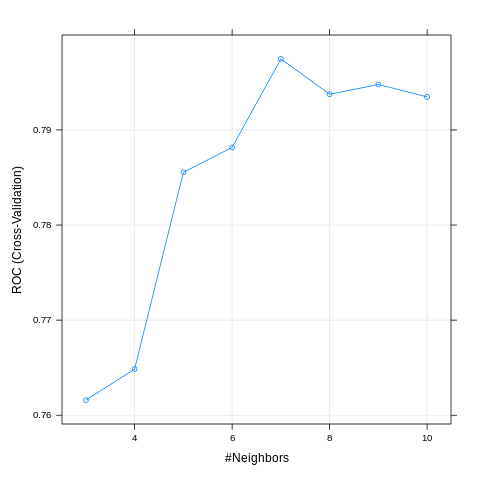

In [22]:
%%R
plot(model_knn)

In [23]:
%%R
pred_knn <- predict(model_knn, test_set)

In [25]:
%%R
cm_knn <- confusionMatrix(pred_knn, test_set$diabetes, positive="pos")

# Prediction Probabilities
pred_prob_knn <- predict(model_knn, test_set, type="prob")
# ROC value
roc_knn <- roc(test_set$diabetes, pred_prob_knn$pos)


R[write to console]: Setting levels: control = neg, case = pos

R[write to console]: Setting direction: controls < cases



In [26]:
%%R
cm_knn

Confusion Matrix and Statistics

          Reference
Prediction neg pos
       neg 107  32
       pos  43 118
                                        
               Accuracy : 0.75          
                 95% CI : (0.697, 0.798)
    No Information Rate : 0.5           
    P-Value [Acc > NIR] : <2e-16        
                                        
                  Kappa : 0.5           
                                        
 Mcnemar's Test P-Value : 0.2482        
                                        
            Sensitivity : 0.7867        
            Specificity : 0.7133        
         Pos Pred Value : 0.7329        
         Neg Pred Value : 0.7698        
             Prevalence : 0.5000        
         Detection Rate : 0.3933        
   Detection Prevalence : 0.5367        
      Balanced Accuracy : 0.7500        
                                        
       'Positive' Class : pos           
                                        


In [27]:
%%R
roc_knn


Call:
roc.default(response = test_set$diabetes, predictor = pred_prob_knn$pos)

Data: pred_prob_knn$pos in 150 controls (test_set$diabetes neg) < 150 cases (test_set$diabetes pos).
Area under the curve: 0.8081


                 [,1]
neg vs. pos 0.8081333


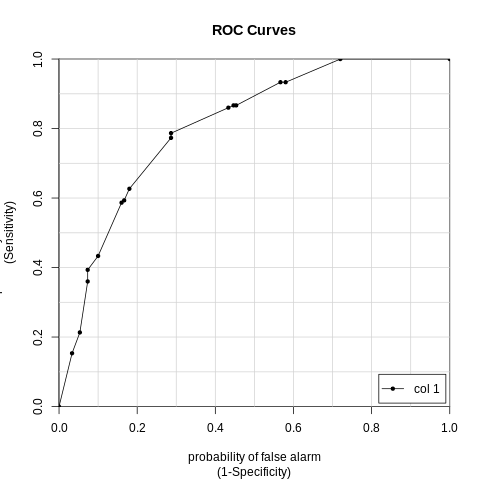

In [28]:
%%R

caTools::colAUC(pred_prob_knn$pos, test_set$diabetes, plotROC = T)

In [29]:
%%R
data("PimaIndiansDiabetes")
df = PimaIndiansDiabetes

In [30]:
%%R
df$diabetes=as.factor(df$diabetes)

In [32]:
%%R
set.seed(123)

partition <- caret::createDataPartition(y = df$diabetes, times = 1, p = 0.7, list = FALSE)

In [33]:
%%R
train_set <- df[partition,]

# create testing data set, subtracting the rows partition to get remaining 30% of the data
test_set <- df[-partition,]


In [34]:
%%R
train_set<-upsample(
  train_set,
  cat_col= "diabetes",
  id_col = NULL,
  id_method = "n_ids",
  mark_new_rows = FALSE
)

In [35]:
%%R
set.seed(222)
model_knn <- caret::train(diabetes ~., data = train_set,
                          method = "knn",
                          metric = "ROC",
                          tuneGrid = expand.grid(.k = c(3:10)),
                          trControl = trainControl(method = "cv", number = 10,
                                                   classProbs = T, summaryFunction = twoClassSummary),
                          preProcess = c("center","scale","pca"))

In [36]:
%%R
model_knn

k-Nearest Neighbors 

700 samples
  8 predictor
  2 classes: 'neg', 'pos' 

Pre-processing: centered (8), scaled (8), principal component signal
 extraction (8) 
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 630, 630, 630, 630, 630, 630, ... 
Resampling results across tuning parameters:

  k   ROC        Sens       Spec     
   3  0.8216735  0.6742857  0.8428571
   4  0.8227347  0.6828571  0.8142857
   5  0.8226939  0.6742857  0.8200000
   6  0.8227347  0.6828571  0.7914286
   7  0.8222857  0.6857143  0.8057143
   8  0.8157143  0.6771429  0.7885714
   9  0.8186531  0.6771429  0.8057143
  10  0.8158776  0.6771429  0.8200000

ROC was used to select the optimal model using the largest value.
The final value used for the model was k = 6.


In [37]:
%%R
summary(model_knn)

            Length Class      Mode     
learn       2      -none-     list     
k           1      -none-     numeric  
theDots     0      -none-     list     
xNames      7      -none-     character
problemType 1      -none-     character
tuneValue   1      data.frame list     
obsLevels   2      -none-     character
param       0      -none-     list     


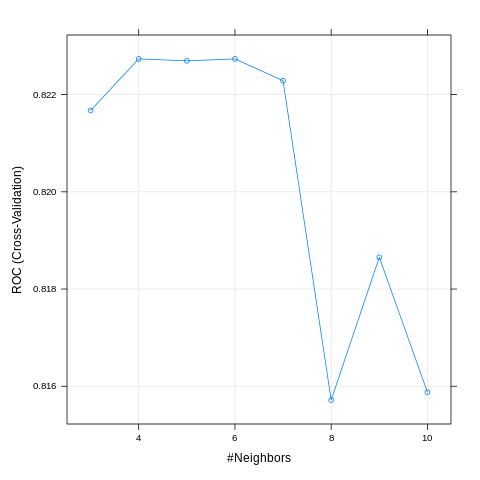

In [38]:
%%R
plot(model_knn)

In [39]:
%%R
pred_knn <- predict(model_knn, test_set)

In [40]:
%%R
cm_knn <- confusionMatrix(pred_knn, test_set$diabetes, positive="pos")


In [41]:
%%R
pred_prob_knn <- predict(model_knn, test_set, type="prob")

In [42]:
%%R
roc_knn <- roc(test_set$diabetes, pred_prob_knn$pos)

R[write to console]: Setting levels: control = neg, case = pos

R[write to console]: Setting direction: controls < cases



In [43]:
%%R
cm_knn

Confusion Matrix and Statistics

          Reference
Prediction neg pos
       neg 100  30
       pos  50  50
                                          
               Accuracy : 0.6522          
                 95% CI : (0.5868, 0.7136)
    No Information Rate : 0.6522          
    P-Value [Acc > NIR] : 0.53037         
                                          
                  Kappa : 0.2756          
                                          
 Mcnemar's Test P-Value : 0.03365         
                                          
            Sensitivity : 0.6250          
            Specificity : 0.6667          
         Pos Pred Value : 0.5000          
         Neg Pred Value : 0.7692          
             Prevalence : 0.3478          
         Detection Rate : 0.2174          
   Detection Prevalence : 0.4348          
      Balanced Accuracy : 0.6458          
                                          
       'Positive' Class : pos             
                              

In [44]:
%%R
roc_knn


Call:
roc.default(response = test_set$diabetes, predictor = pred_prob_knn$pos)

Data: pred_prob_knn$pos in 150 controls (test_set$diabetes neg) < 80 cases (test_set$diabetes pos).
Area under the curve: 0.743


                 [,1]
neg vs. pos 0.7430417


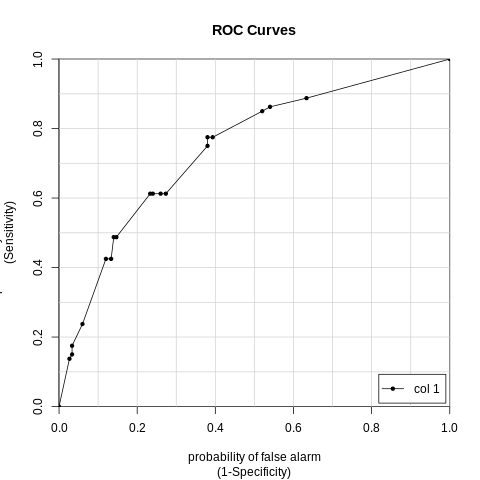

In [45]:
%%R
caTools::colAUC(pred_prob_knn$pos, test_set$diabetes, plotROC = T)